In [1]:
from manim import *
from manim_ml.neural_network import Convolutional2DLayer, FeedForwardLayer, NeuralNetwork, MaxPooling2DLayer, ImageLayer

config.media_width = "75%"
config.verbosity = "WARNING"

In [ ]:
%%manim -qm NN
class NN(Scene):
    def construct(self):
        # Make the neural network
        nn = NeuralNetwork([
            FeedForwardLayer(num_nodes=3),
            FeedForwardLayer(num_nodes=5),
            FeedForwardLayer(num_nodes=3)
        ])
        self.add(nn)
        # Make the animation
        forward_pass_animation = nn.make_forward_pass_animation(run_time=10)
        # Play the animation
        self.play(forward_pass_animation)

Running on cuda.
torch.Size([1, 1, 28, 28]) torch.Size([1])
(1, 14, 28)
torch.Size([1, 14, 28])


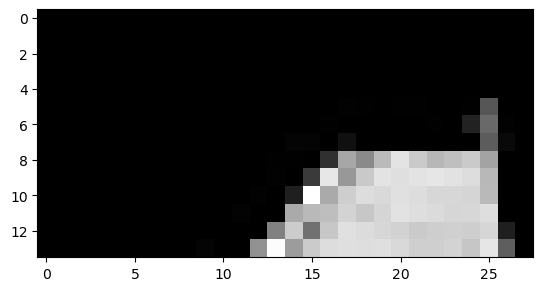

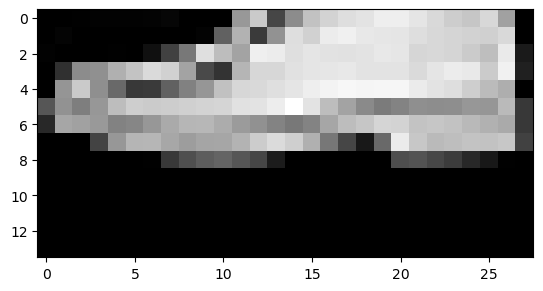

Ankle boot


In [43]:
# Importing essential libraries and modules for deep learning and visualization
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt
from torchinfo import summary
from tqdm.notebook import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Running on {device}.")
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=1, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=False, num_workers=2)

fashion_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
for X, y in trainloader:
    print(X.shape, y.shape)
    X_c1 = np.array(X[:,:,:14,:])
    X_c2 = X[:,:,14:,:]
    X_c1 = X_c1[0]
    X_c2 = X_c2[0]
    print(X_c1.shape)
    print(X_c2.shape)
    img = X_c1
    plt.imshow(img[0], cmap="gray")
    plt.show()
    img = X_c2
    plt.imshow(img[0], cmap="gray")
    plt.show()
    print(fashion_labels[y[0]])
    break

In [44]:
im1 = np.vstack([X_c1,X_c1,X_c1]).transpose(1,2,0)
im2 = np.vstack([X_c2,X_c2,X_c2]).transpose(1,2,0)
print(im1.shape)
#print(im1*255)
print(im2.shape)
#print(im2*255)

(14, 28, 3)
(14, 28, 3)


In [77]:
%%manim -ql VFLDifferent

config.pixel_height = 1600
config.pixel_width = 1600
config.frame_height = 7.0
config.frame_width = 7.0
class VFLDifferent(Scene):
    def construct(self):
        # Make the neural network \
        # Convolutional2DLayer(num_feature_maps, feature_map_size, filter_size)
        c1 = NeuralNetwork([
            Convolutional2DLayer(1, 7, 3, filter_spacing=0.32), # Note the default stride is 1. 
            Convolutional2DLayer(3, 4, 2, filter_spacing=0.32),
            FeedForwardLayer(5),
            FeedForwardLayer(2),
        ],
        layer_spacing=0.25,
        )

        c2 = NeuralNetwork([
            FeedForwardLayer(10),
            FeedForwardLayer(6),
            FeedForwardLayer(5),
            FeedForwardLayer(2),
        ],
        layer_spacing=0.25,
        )
        c1.shift(UP)
        c1.scale(0.6)
        c2.scale(0.6)
        c2.next_to(c1,DOWN)
        self.add(c1)
        self.add(c2)
        
        g = NeuralNetwork([
            FeedForwardLayer(4),
            FeedForwardLayer(2),
        ],
        layer_spacing=0.25,
        )
        g.next_to(c1,RIGHT)
        g.scale(0.6)
        g.shift(DOWN*0.5)
        self.add(g)
        # Make the animation
        forward_pass_animation_c1 = c1.make_forward_pass_animation(run_time=10)
        forward_pass_animation_c2 = c2.make_forward_pass_animation(run_time=10)
        # Play the animation
        

        forward_pass_animation_g = g.make_forward_pass_animation(run_time=10)
        self.play(
            [forward_pass_animation_c1,
             forward_pass_animation_c2
            ],
            run_time=10)

        features = [
            c2.all_layers[-1].node_group[0].copy(),
            c2.all_layers[-1].node_group[1].copy(),
            c1.all_layers[-1].node_group[0].copy(),
            c1.all_layers[-1].node_group[1].copy()
        ]
        for f in features:
            self.add(f)
            
        transforms = [Transform(f,g.all_layers[0].node_group[i]) for i,f in enumerate(features)]
        self.play(transforms)
        """self.play([
            Transform(c1.all_layers[-1].node_group[0],g.all_layers[0].node_group[2]),
            Transform(c1.all_layers[-1].node_group[1],g.all_layers[0].node_group[3]),
            Transform(c2.all_layers[-1].node_group[0],g.all_layers[0].node_group[0]),
            Transform(c2.all_layers[-1].node_group[1],g.all_layers[0].node_group[1]),
        ])"""
        self.play(forward_pass_animation_g,run_time=5)



Manim Community v0.18.1

Constructing layers
Current layer: Convolutional2DLayer
Current layer: Convolutional2DLayer
Current layer: FeedForwardLayer
Current layer: FeedForwardLayer
NeuralNetwork([
    Convolutional2DLayer(z_index=3, title_text= , ),
    Convolutional2DToConvolutional2D(input_layer=Convolutional2DLayer,output_layer=Convolutional2DLayer,)(z_index=2, title_text= , ),
    Convolutional2DLayer(z_index=3, title_text= , ),
    Convolutional2DToFeedForward(input_layer=Convolutional2DLayer,output_layer=FeedForwardLayer,)(z_index=2, title_text= , ),
    FeedForwardLayer(z_index=3, title_text= , ),
    FeedForwardToFeedForward(input_layer=FeedForwardLayer,output_layer=FeedForwardLayer,)(z_index=2, title_text= , ),
    FeedForwardLayer(z_index=3, title_text= , ),
])
Constructing layers
Current layer: FeedForwardLayer
Current layer: FeedForwardLayer
Current layer: FeedForwardLayer
Current layer: FeedForwardLayer
NeuralNetwork([
    FeedForwardLayer(z_index=3, title_text= , ),
    FeedForwardToFeedForward(i

In [80]:
%%manim -ql VFLSame

config.pixel_height = 1600
config.pixel_width = 1600
config.frame_height = 7.0
config.frame_width = 7.0
class VFLSame(Scene):
    def construct(self):
        # Make the neural network \
        # Convolutional2DLayer(num_feature_maps, feature_map_size, filter_size)
        c1 = NeuralNetwork([
            Convolutional2DLayer(1, 7, 3, filter_spacing=0.32), # Note the default stride is 1. 
            FeedForwardLayer(5),
            FeedForwardLayer(2),
        ],
        layer_spacing=0.25,
        )

        c2 = c1.copy()
        c1.shift(UP)
        c1.scale(0.6)
        c2.scale(0.6)
        c2.next_to(c1,DOWN)
        self.add(c1)
        self.add(c2)
        
        g = NeuralNetwork([
            FeedForwardLayer(4),            
            FeedForwardLayer(3),
            FeedForwardLayer(2),
        ],
        layer_spacing=0.25,
        )
        g.next_to(c1,RIGHT)
        g.scale(0.6)
        g.shift(DOWN*0.5)
        self.add(g)
        # Make the animation
        forward_pass_animation_c1 = c1.make_forward_pass_animation(run_time=10)
        forward_pass_animation_c2 = c2.make_forward_pass_animation(run_time=10)
        # Play the animation
        

        forward_pass_animation_g = g.make_forward_pass_animation(run_time=10)
        self.play(
            [forward_pass_animation_c1,
             forward_pass_animation_c2
            ],
            run_time=10)

        features = [
            c2.all_layers[-1].node_group[0].copy(),
            c2.all_layers[-1].node_group[1].copy(),
            c1.all_layers[-1].node_group[0].copy(),
            c1.all_layers[-1].node_group[1].copy()
        ]
        for f in features:
            self.add(f)
            
        transforms = [Transform(f,g.all_layers[0].node_group[i]) for i,f in enumerate(features)]
        self.play(transforms)
        """self.play([
            Transform(c1.all_layers[-1].node_group[0],g.all_layers[0].node_group[2]),
            Transform(c1.all_layers[-1].node_group[1],g.all_layers[0].node_group[3]),
            Transform(c2.all_layers[-1].node_group[0],g.all_layers[0].node_group[0]),
            Transform(c2.all_layers[-1].node_group[1],g.all_layers[0].node_group[1]),
        ])"""
        self.play(forward_pass_animation_g,run_time=5)



Manim Community v0.18.1

Constructing layers
Current layer: Convolutional2DLayer
Current layer: FeedForwardLayer
Current layer: FeedForwardLayer
NeuralNetwork([
    Convolutional2DLayer(z_index=3, title_text= , ),
    Convolutional2DToFeedForward(input_layer=Convolutional2DLayer,output_layer=FeedForwardLayer,)(z_index=2, title_text= , ),
    FeedForwardLayer(z_index=3, title_text= , ),
    FeedForwardToFeedForward(input_layer=FeedForwardLayer,output_layer=FeedForwardLayer,)(z_index=2, title_text= , ),
    FeedForwardLayer(z_index=3, title_text= , ),
])
Constructing layers
Current layer: FeedForwardLayer
Current layer: FeedForwardLayer
Current layer: FeedForwardLayer
NeuralNetwork([
    FeedForwardLayer(z_index=3, title_text= , ),
    FeedForwardToFeedForward(input_layer=FeedForwardLayer,output_layer=FeedForwardLayer,)(z_index=2, title_text= , ),
    FeedForwardLayer(z_index=3, title_text= , ),
    FeedForwardToFeedForward(input_layer=FeedForwardLayer,output_layer=FeedForwardLayer,)(z_index=2, title_text= , ),
